In [52]:
import sys
sys.path.insert(0, '../basic codes')

import class_magnesium_not_drop_na #_transform_pairings
from class_magnesium_not_drop_na import *
from probability_density_plot import *

from sklearn.metrics import f1_score
from math import ceil

import sys
from IPython.core.display import clear_output
def change_output(x):
    clear_output()
    sys.stdout.write(x)
    sys.stdout.flush()
    
from IPython.core.display import display, HTML

#from plot_gridsearch_results import *
from imblearn.pipeline import Pipeline

In [2]:
import importlib
importlib.reload(class_magnesium_not_drop_na)
from class_magnesium_not_drop_na import *

In [3]:
fold = ''
file_ = 'Feature_chains.csv'

In [4]:
def plot_one_plot(plot_elements):
    [eval(plot_string) for plot_string in plot_elements]

In [13]:
def load_data(filename):
    data = pd.read_table(filename)
    data['id'] = 
    if ('DSSR' in data.columns):
        data.drop('DSSR', axis=1, inplace=True)  
    data = data.dropna()
    y_test = deepcopy(np.array(data['mg']))

    data = data[~(data['chainlen']>1000)]

    x_test = np.matrix(data[list(data.columns)[1:-1]])
    change_output('Data loaded')
    return {'data':data, 'x':x_test, 'y':y_test}

def plot_one_plot(plot_elements):
    [eval(plot_string) for plot_string in plot_elements]

In [6]:
import importlib
importlib.reload(class_magnesium_not_drop_na)
from class_magnesium_not_drop_na import *

In [7]:
m = Magnesium(file_, fold = fold,colours = ['#f6c35b', '#929292'], with_groups = False, 
              model = RandomForestClassifier(n_estimators=200, n_jobs=-1, criterion='gini', 
                                             max_depth = 50, min_samples_leaf = 1))

C:\Users\tikho\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [16]:
import seaborn as sns; 
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(m.data[m.features])

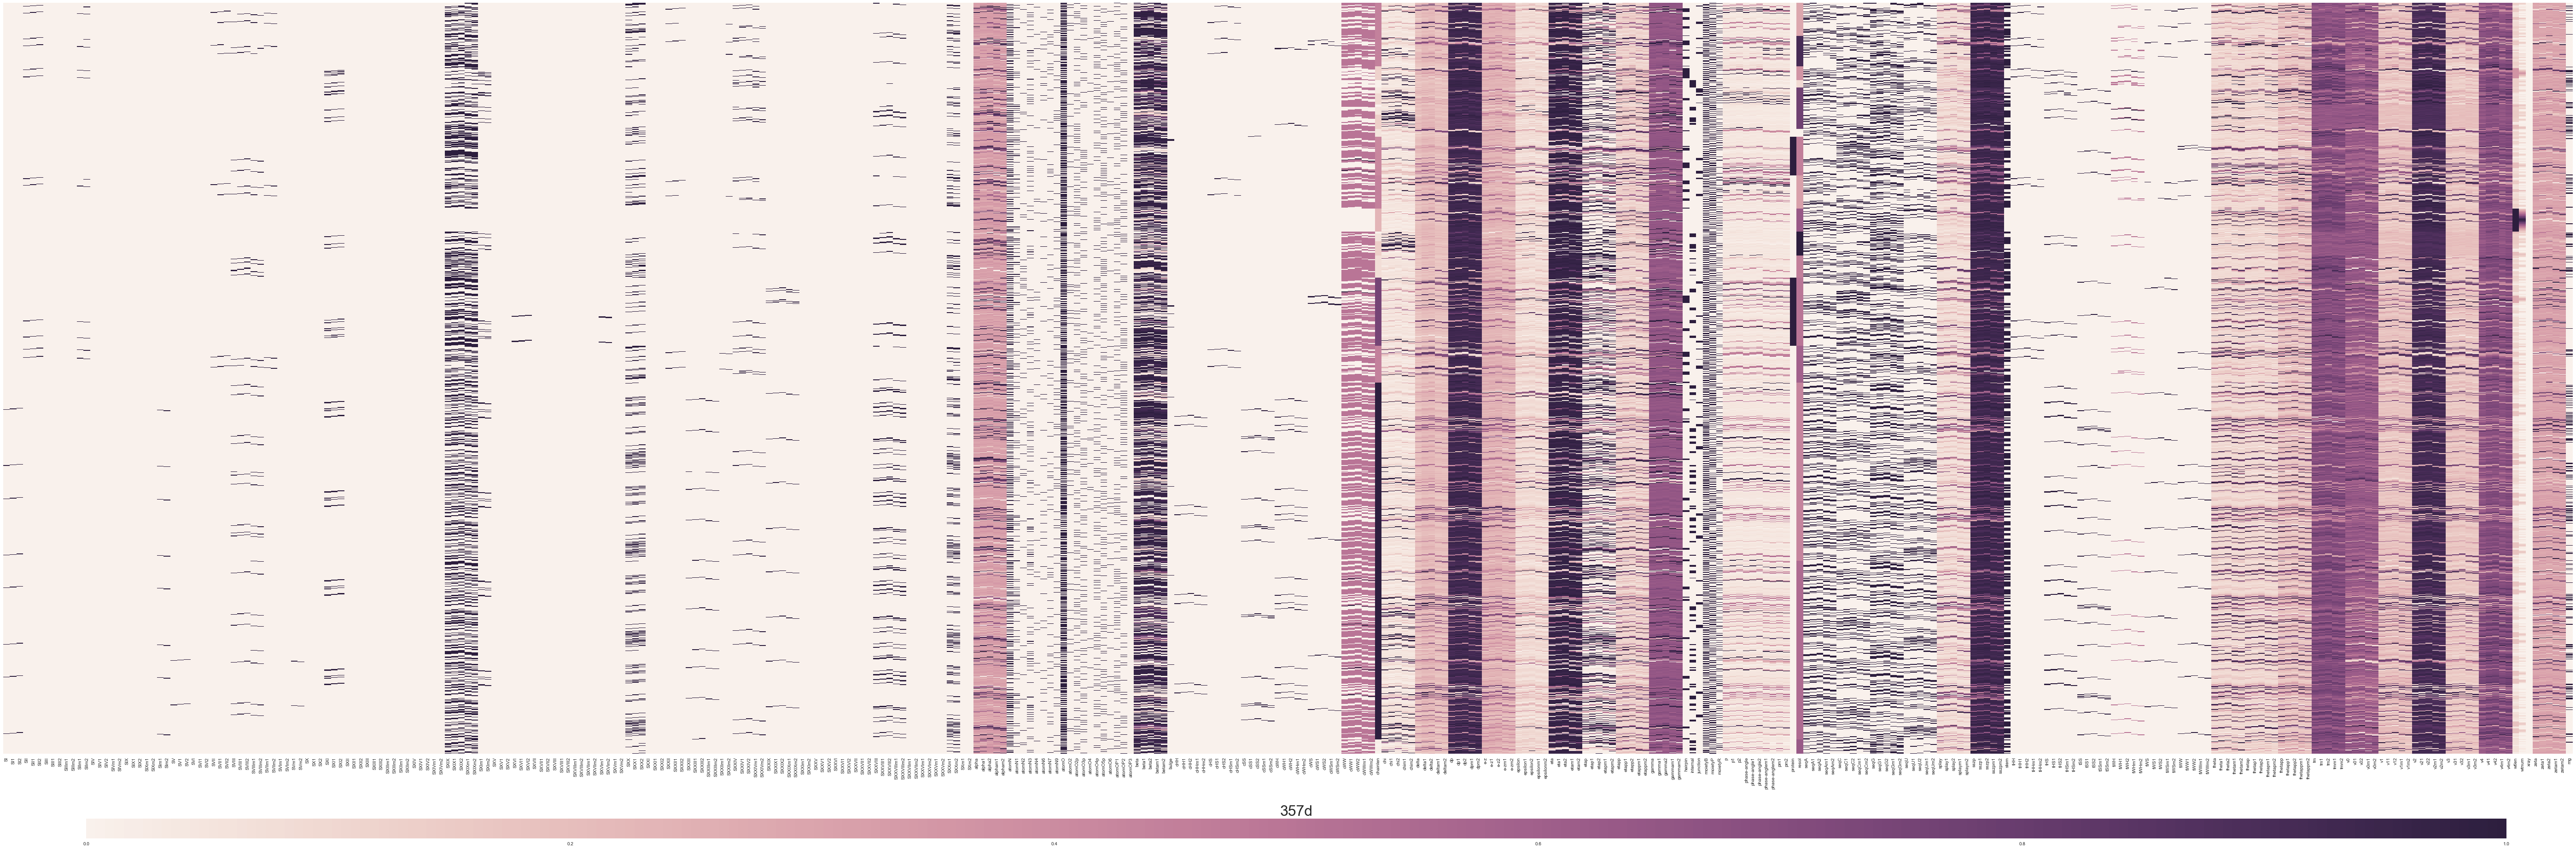

In [19]:
sns.set()
fig, ax = plt.subplots()
ax.yaxis.tick_right()
# the size of A4 paper
fig.set_size_inches(100, 30)
sns.heatmap(data_scaled, ax = ax, xticklabels=m.features, yticklabels=False,
            cbar_kws={"orientation": "horizontal"}, cbar_ax = fig.add_axes([0.15, 0.04, 0.73, 0.02]) );
plt.title('357d', fontsize=32);

In [8]:
angles = ['sszp','v1','v2', 'v3', 'v0', 'e-z', 'eta','phase-angle','thetap', 'zeta', 
          'splay', 'chi', 'delta', 'dp', 'epsilon', 'etap', 'etapp', 
          'gamma', 'p', 'theta', 'tm' ,
           'SII', 'SIII', 'SIV', 'SV', 'SVI', 'SVII', 'SIX', 'SX', 'SXII','SXIII', 'SXIV', 'SXV', 'SXVI','SXVII', 'SXVIII',
          'SXXI','SXXII', 'SXXV','SXXVI', 'SXXVII', 'cHS', 'tHH']          
angles = np.ravel([[''.join([i,j]) for i in angles] for j in ['m2', 'm1', '', '1', '2']]).tolist()
features = deepcopy(m.features)
[print(i) for i in ['xray','mg']+angles if i not in features]
[features.remove(i) for i in ['xray','mg']+angles];
print('%d features were deleted.' %len(['xray','mg']+angles))
features = deepcopy(m.features)
features.remove('mg')
#features = np.array(features)[indices][:102]

217 features were deleted.


In [9]:
train_x = np.array(m.data[features])
train_y = np.array(m.data['mg'])

In [79]:
np.unique([i.split('.')[0] for i in m.data['pdb_chain']])

array(['1drz', '1duh', '1ehz', '1evv', '1f27', '1fir', '1gid', '1hr2',
       '1i9v', '1jj2', '301d', '354d', '357d', '364d', '429d', '430d',
       '462d'], dtype='<U4')

In [81]:
sorted(['1drz','430d','1f27','1duh','354d','364d','1i9v','1evv','429d','462d','301d','1hr2','1ehz','1gid','357d','1fir'])

['1drz',
 '1duh',
 '1ehz',
 '1evv',
 '1f27',
 '1fir',
 '1gid',
 '1hr2',
 '1i9v',
 '301d',
 '354d',
 '357d',
 '364d',
 '429d',
 '430d',
 '462d']

### Make a stack from all data I have

In [60]:
fold_1 = '../input files/rna-ion-step2/'
fold_2 = '../main_datasets/validation/'
df_1 = load_data(fold_2+'set_val2_A_7.csv')
df_2 = load_data(fold_2+'set_val-minus-minresol_A_7.csv')
df_3 = load_data(fold_2+'set_d_A_7.csv')
df_4 = load_data(fold_1+'set_minresol_A_7.csv')
df_3['data'].shape

Data loaded

(4045, 385)

In [62]:
full_data = pd.concat([df_1['data'], df_2['data'], df_3['data'], df_4['data']])
full_data.shape

(228359, 385)

### Train & Predict

In [21]:
import xgboost as xgb
from catboost import CatBoostClassifier
rus = RandomUnderSampler(ratio = 'auto', random_state=42, return_indices=True)
m.trained_model = RandomForestClassifier(n_estimators=550, 
                                                        n_jobs=-1, 
                                                        criterion='gini', 
                                                        max_depth = 16, 
                                                        max_features = 0.6,
                                                        min_samples_leaf = 2)
# m.trained_model = xgb.XGBClassifier(n_estimators=300, learning_rate=0.16, gamma=3,max_depth = 4, 
#                                     reg_lambda=0.2,reg_alpha=0.7, colsample_bylevel=1, colsample_bytree=1)

# m.trained_model = CatBoostClassifier(
#     iterations=200,
#     learning_rate=0.9,
#     depth=6,
#  #   reg_lambda=0.2
#     #logging_level
# )

x = train_x
y = train_y

x_train, y_train, rus_indexes = rus.fit_sample(x, y)
shuffle_inds = np.arange(x_train.shape[0]).tolist()
np.random.shuffle(shuffle_inds)
x_train, y_train = x_train[shuffle_inds], y_train[shuffle_inds]
m.trained_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features=0.6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=550, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
predict_full =  m.predict(x = full_data[features], 
                           y = full_data['mg'],
                             model=m.trained_model)

In [25]:
predict_full.keys()

dict_keys(['plots', 'roc_auc', 'prediction', 'prec_rec', 'y', 'test_score', 'x', 'probability', 'confusion', 'treshold'])

In [64]:
full_pdbs = np.array([i.split('.')[0] for i in full_data['pdb_chain']])
pdbs = np.unique(full_pdbs)
plot_train = {}
for pdb in pdbs:
    ind = pdb==full_pdbs
    if np.sum(np.array(predict_full['y'])[ind] == 1) > 1:
        y, y_prob, y_pred = np.array(predict_full['y'])[ind], np.array(predict_full['probability'])[ind], np.array(predict_full['prediction'])[ind]
        plot_train[pdb] = plot_probability_density(y_prob, y)
        plot_train[pdb].append(form_plot_string('plt.title', "%s. Score %.2f. Atoms - %d"% (pdb, f1_score(y, y_pred), y.shape[0])))
    else:
        print(pdb)

C:\Users\tikho\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1i6h
1s0v
1s77
2a04
2qwy
3hoz
3ssf
4g6r
4qjd
4qjh
4v5g
5awh
5c4j
5jb2
5l00
5lzy
5up6


In [65]:
plot_train.keys()

dict_keys(['3dil', '4jv5', '2pn3', '3r4f', '2zzm', '5lj3', '1yrj', '4v9q', '4v83', '1drz', '4y1j', '430d', '1j2b', '4p95', '4tue', '4ybb', '4mgn', '2zzn', '2quw', '3la5', '5dm6', '3f2q', '3mei', '5btm', '3v7e', '4kqy', '2qbz', '5aj0', '4jf2', '1ibl', '1un6', '4yco', '3p59', '5aox', '1f27', '5nwq', '4lck', '1duh', '3k0j', '2g3s', '354d', '3j9m', '5d5l', '4wfl', '2nug', '5kpy', '2gdi', '3cgs', '3hax', '1xpe', '5m0i', '5tpy', '5e81', '1dk1', '4v8b', '4mgm', '4k27', '2hw8', '4z4d', '1nbs', '364d', '4lx5', '1xnr', '4pkd', '5el6', '2ply', '5ew4', '4kzd', '4b3m', '1xnq', '3hhn', '4y1m', '1y26', '4pqv', '3eph', '5u3g', '4qk8', '5ddp', '1d4r', '3ftm', '3g78', '1jzv', '2anr', '3oin', '1feu', '3j7o', '2g91', '1lnt', '1i9v', '1n78', '4rum', '4gxy', '4v8d', '5t83', '1dfu', '3ivn', '5c9h', '5une', '4rwn', '4v7l', '3j79', '4v5a', '4yb1', '4znp', '1n32', '5hr6', '1evv', '429d', '5d8h', '5lzv', '1lng', '3wqy', '5j8b', '5ckk', '3td0', '4ycp', '2val', '5mmi', '3ktw', '2ao5', '4phy', '1xmq', '1vq8', '1egk

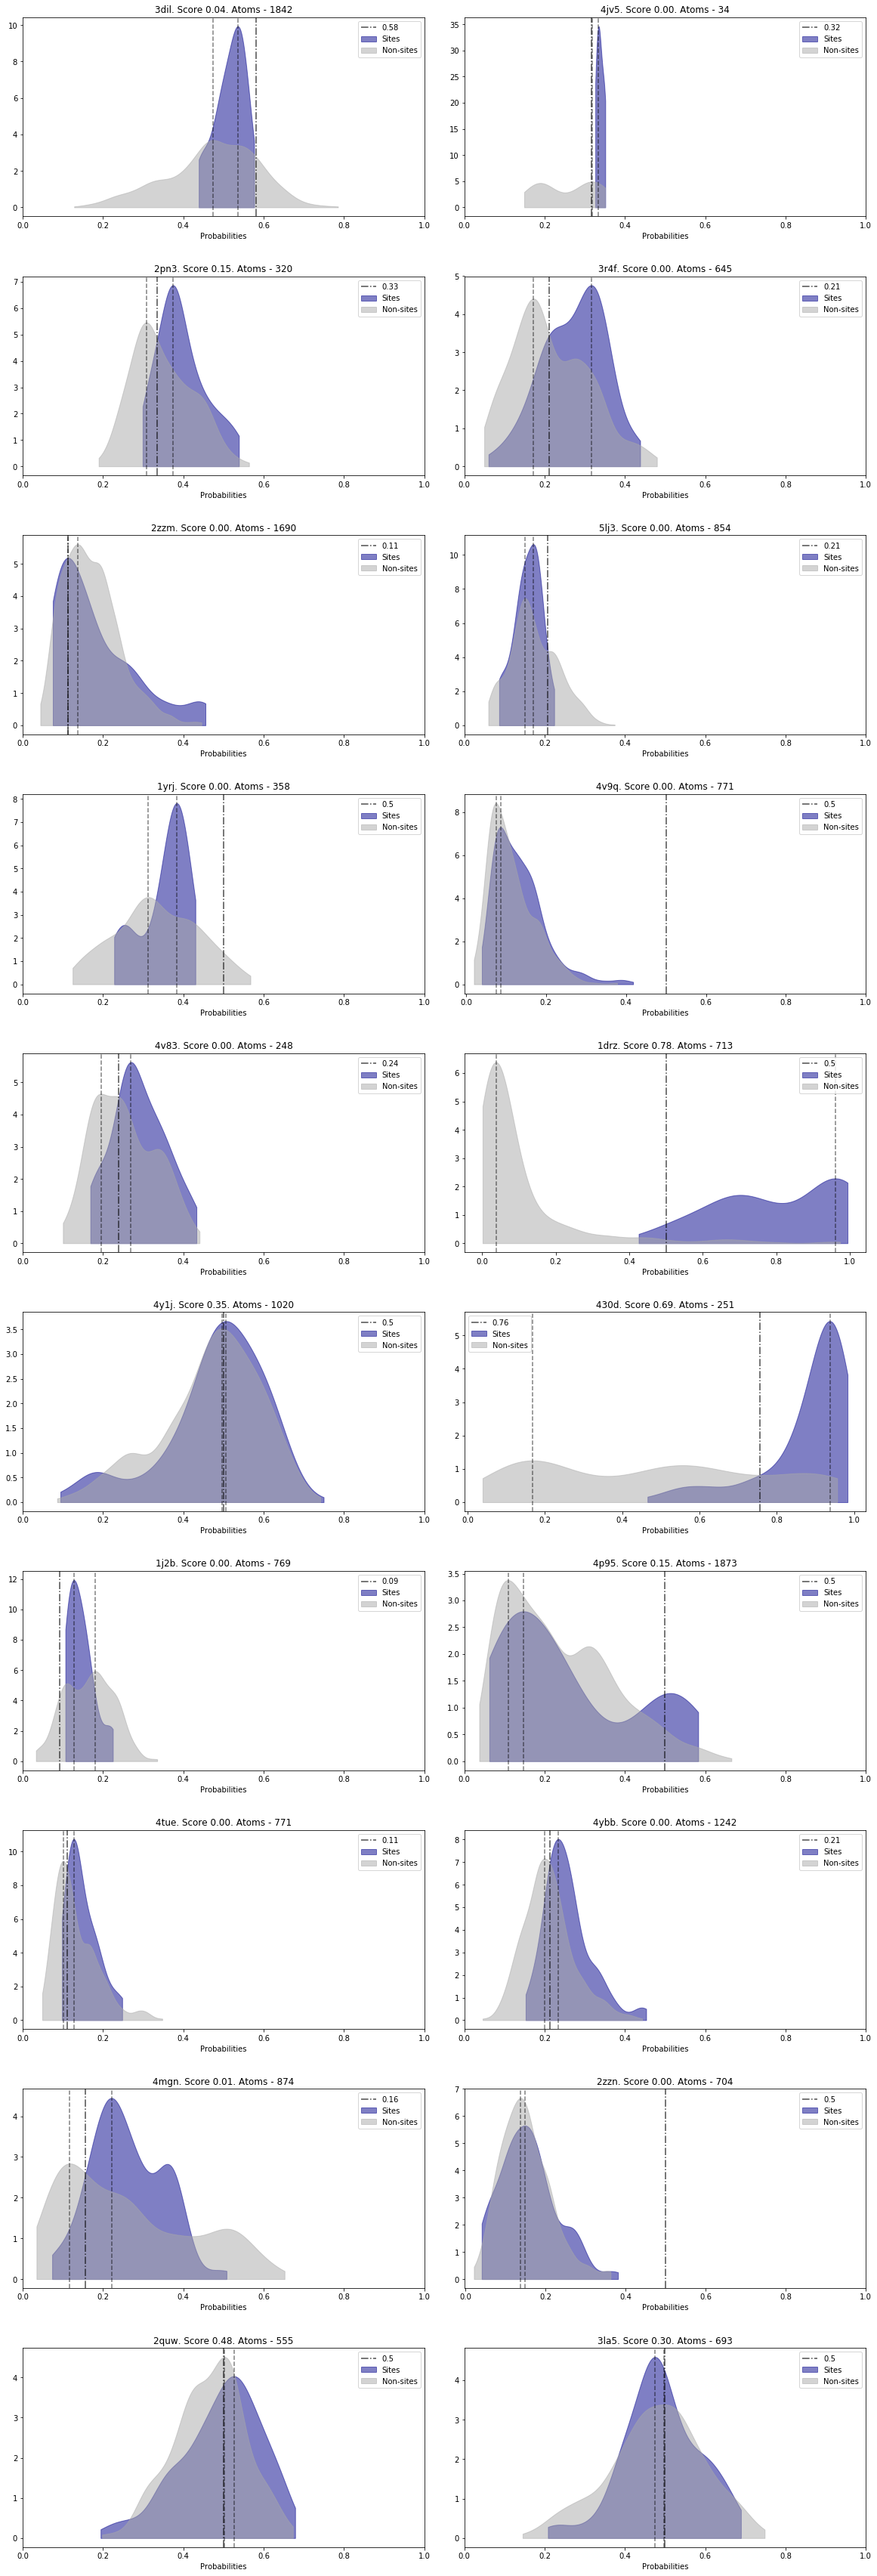

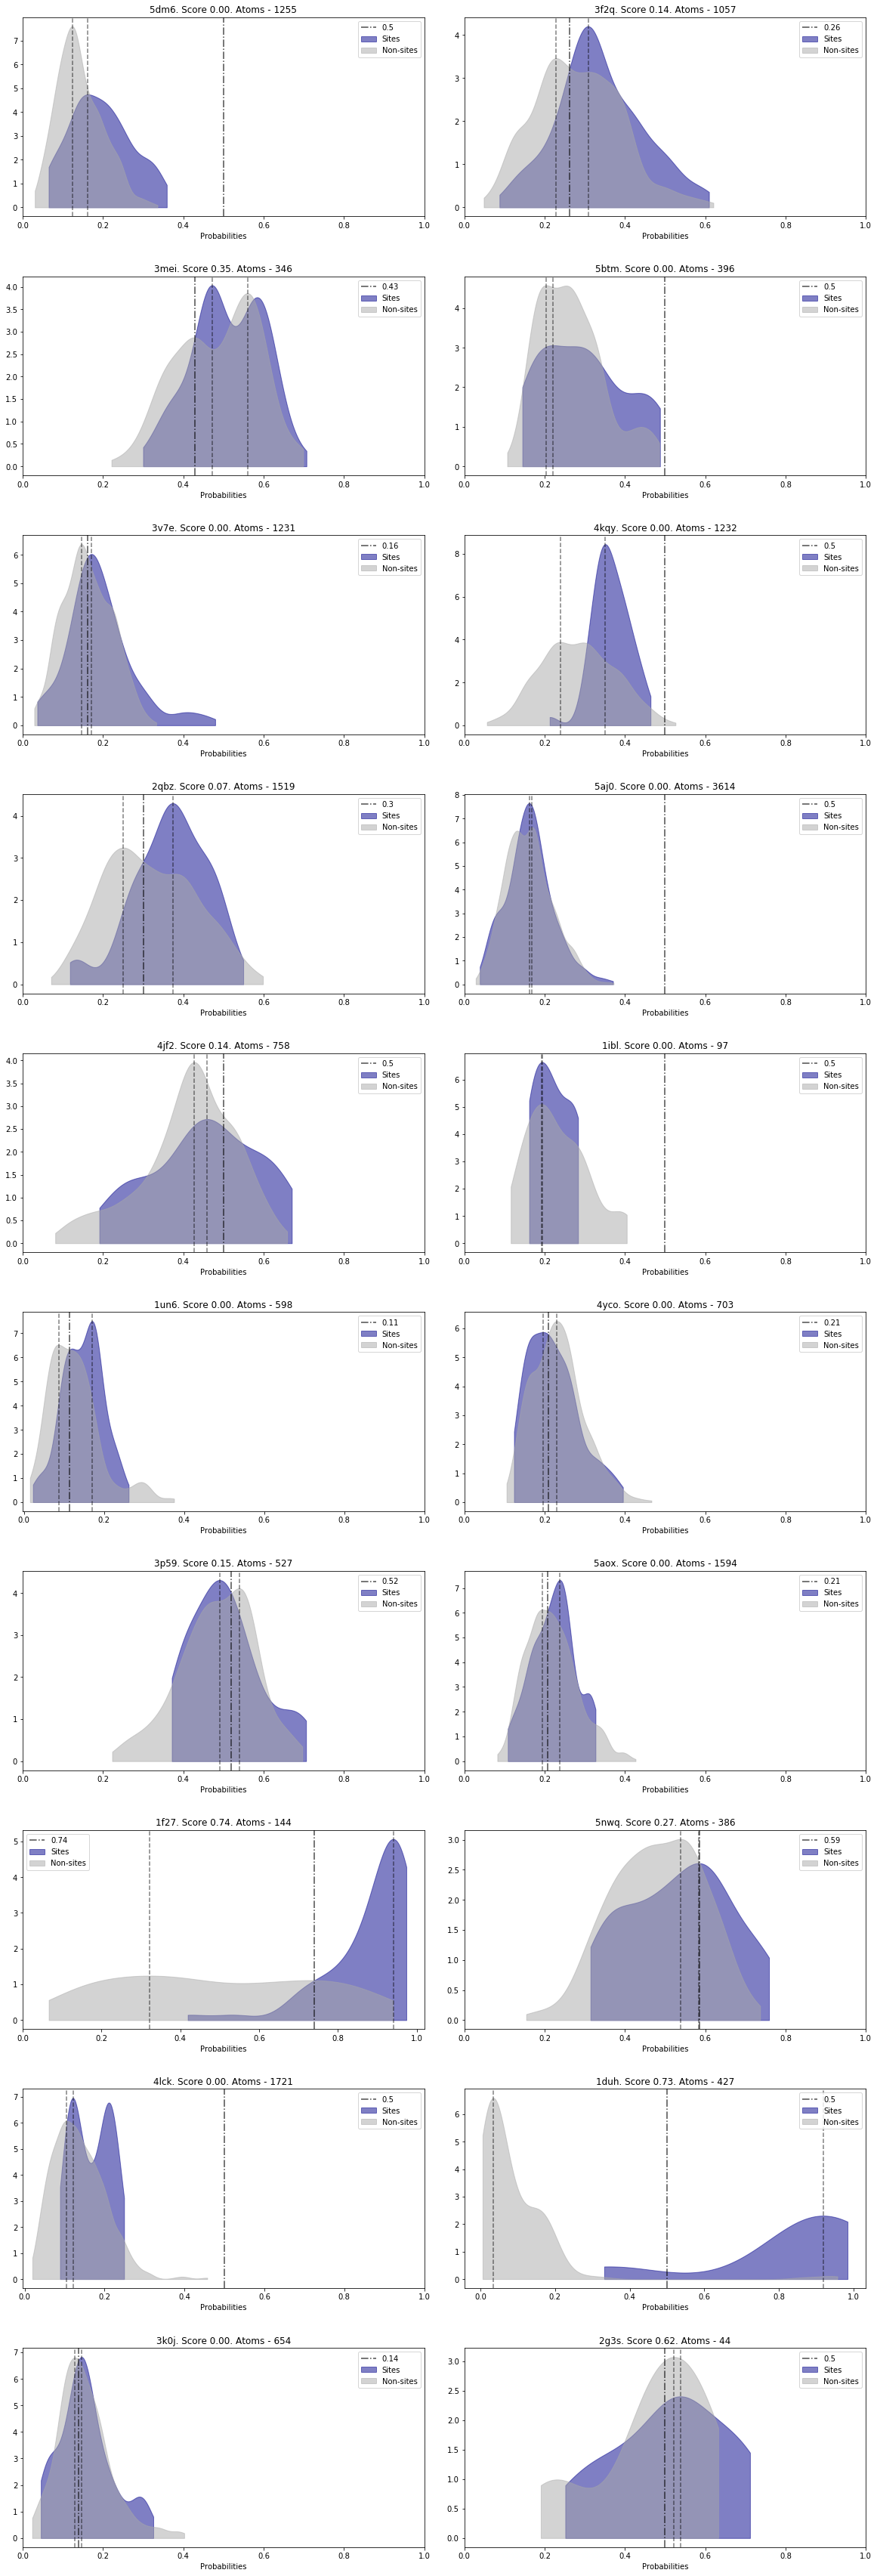

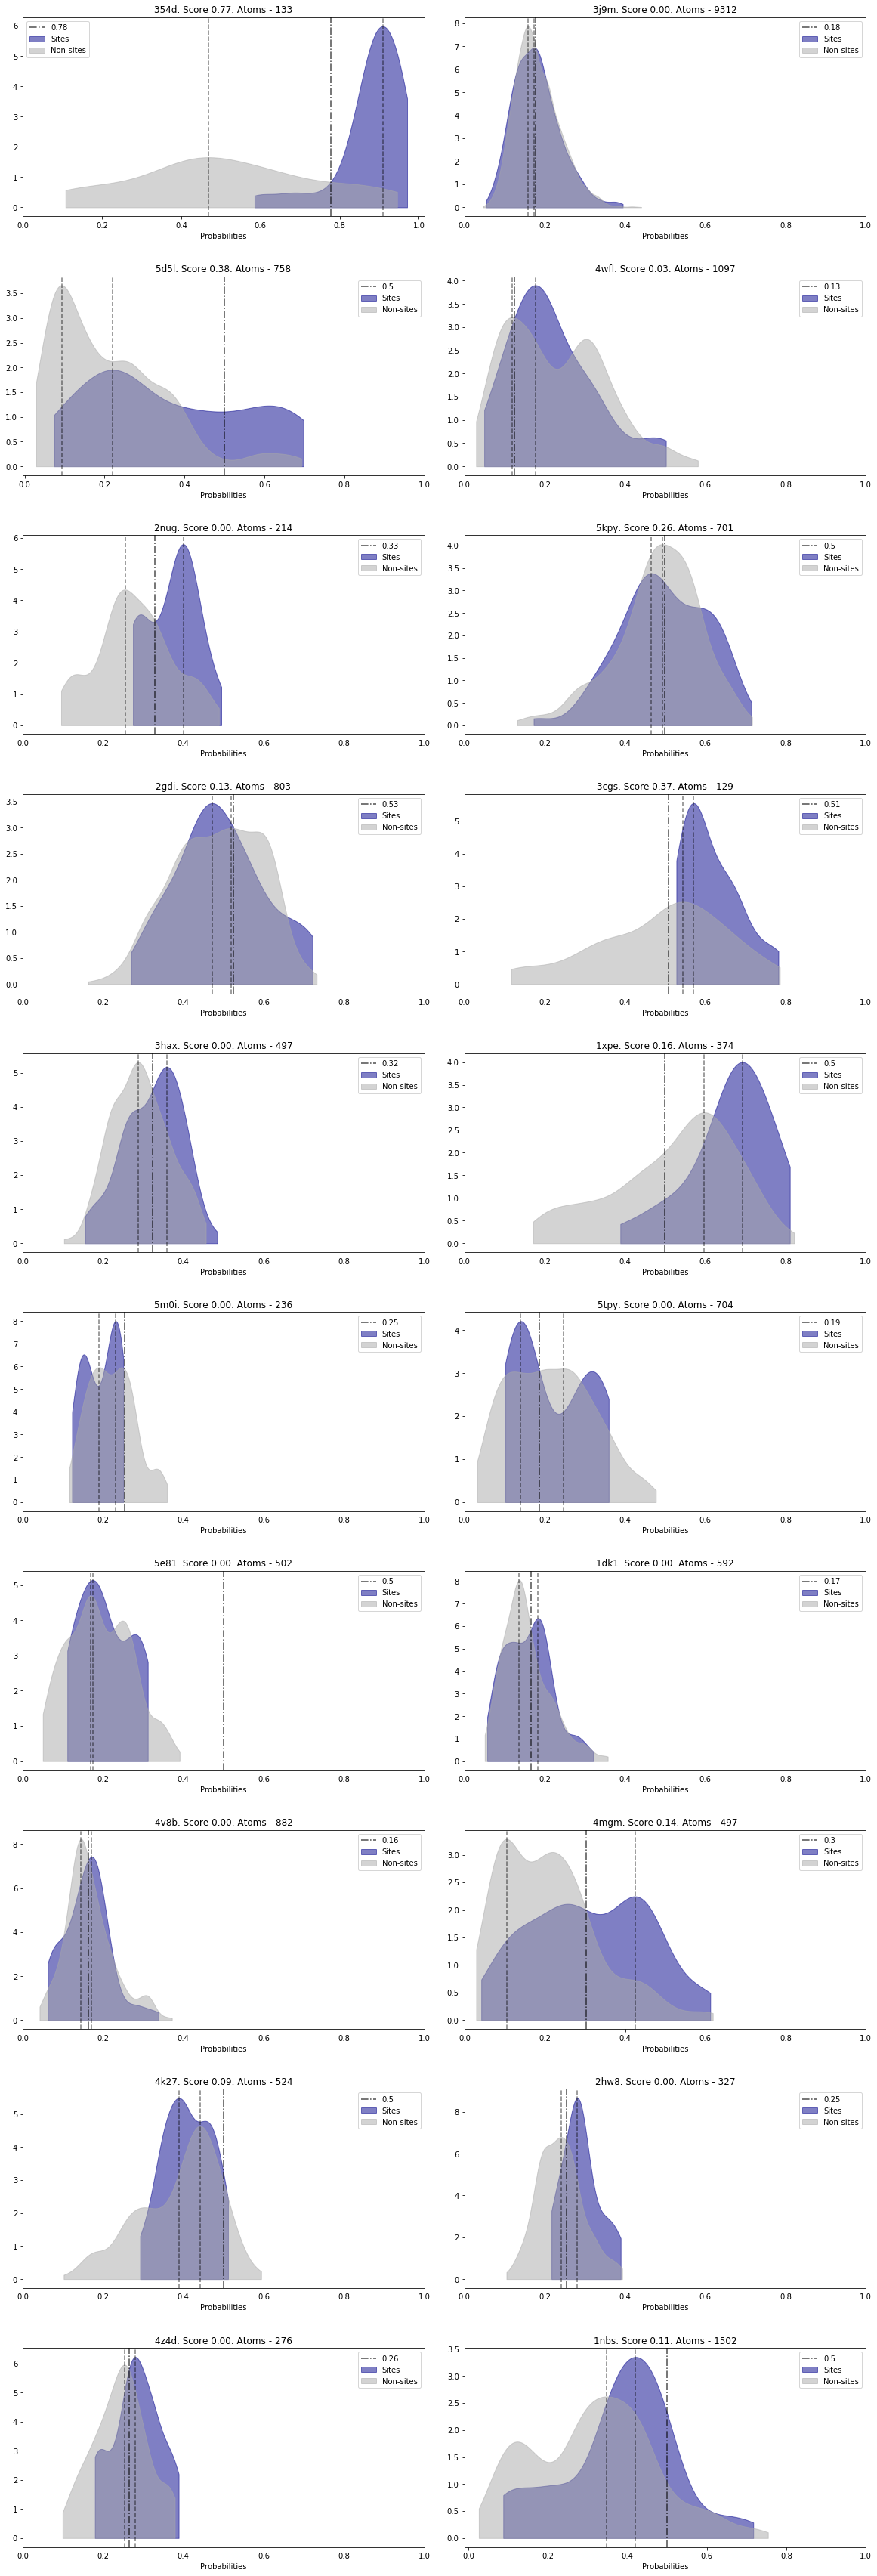

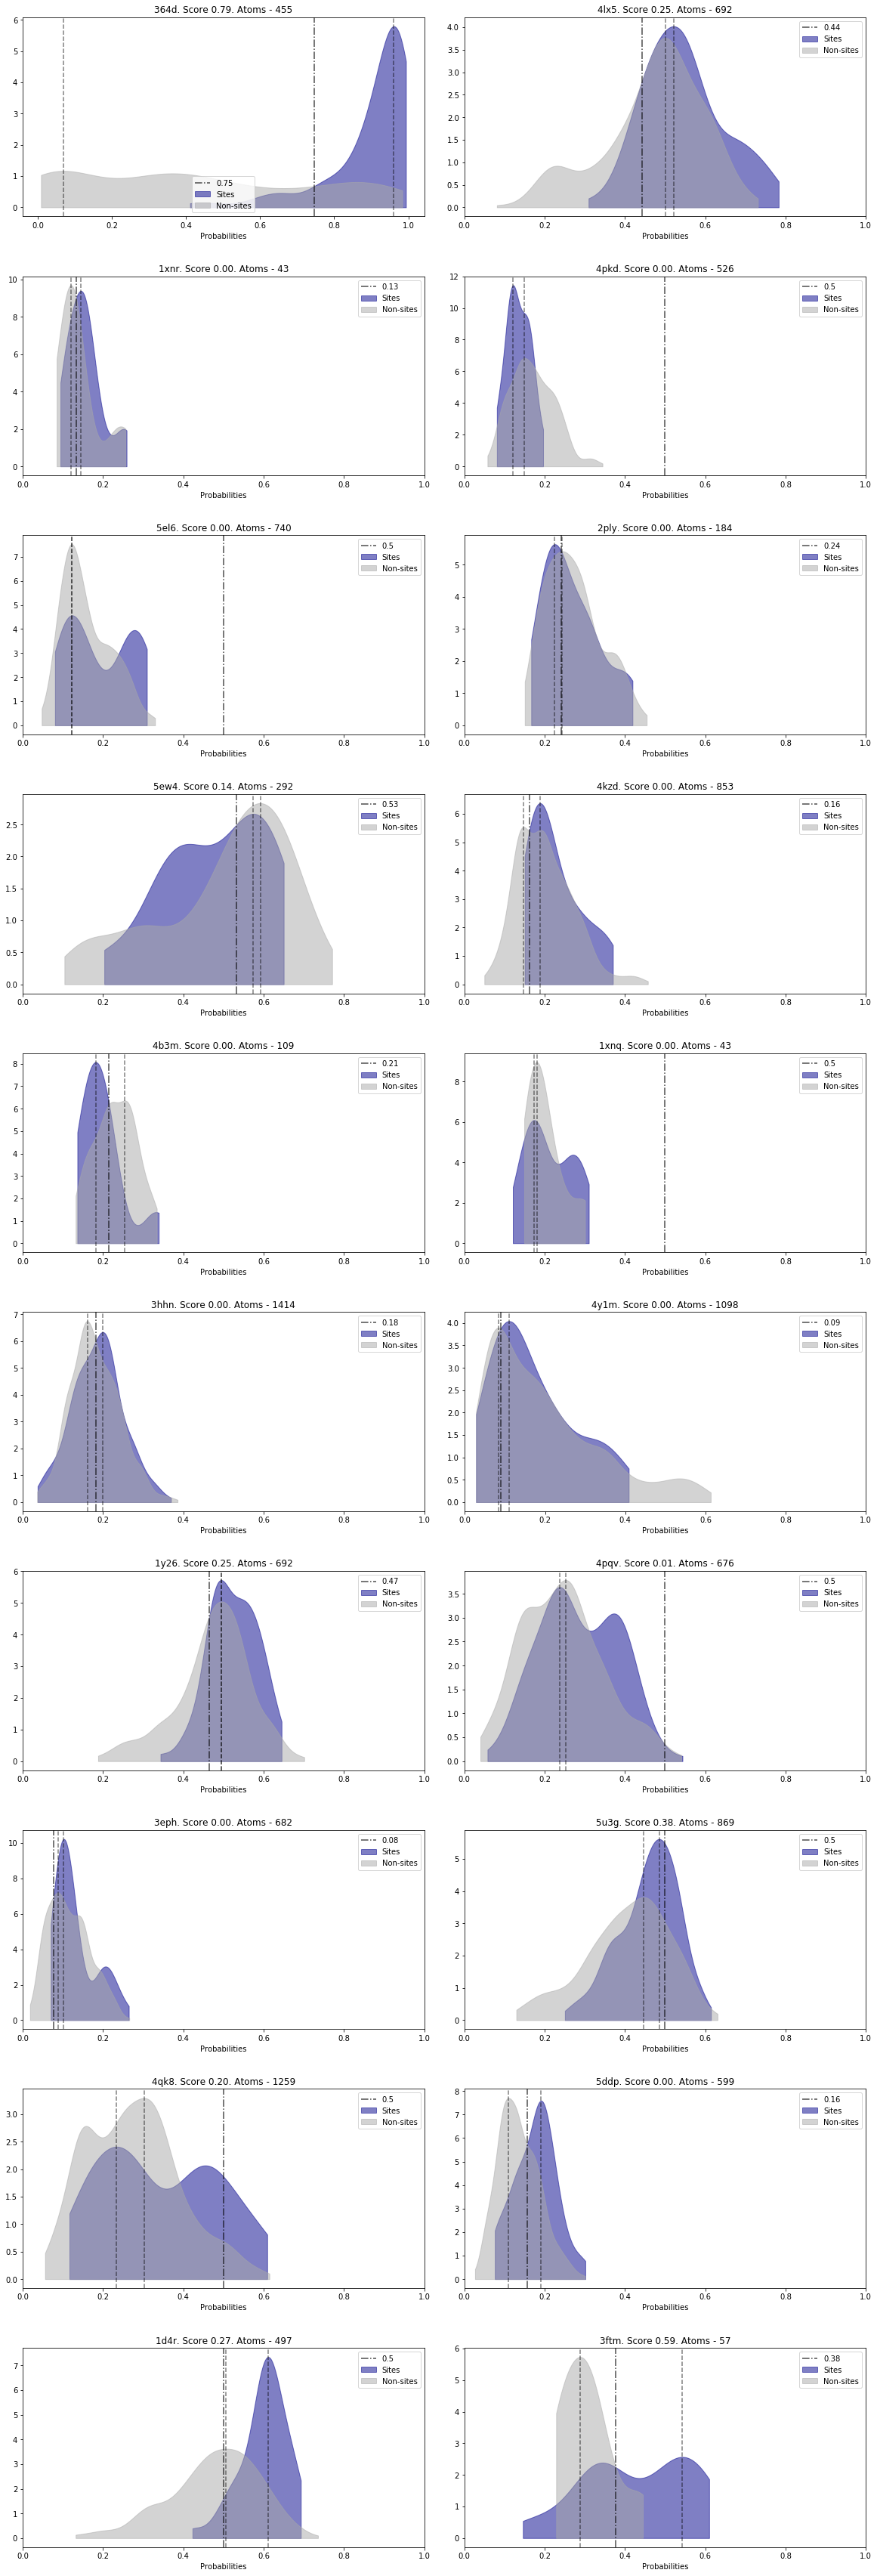

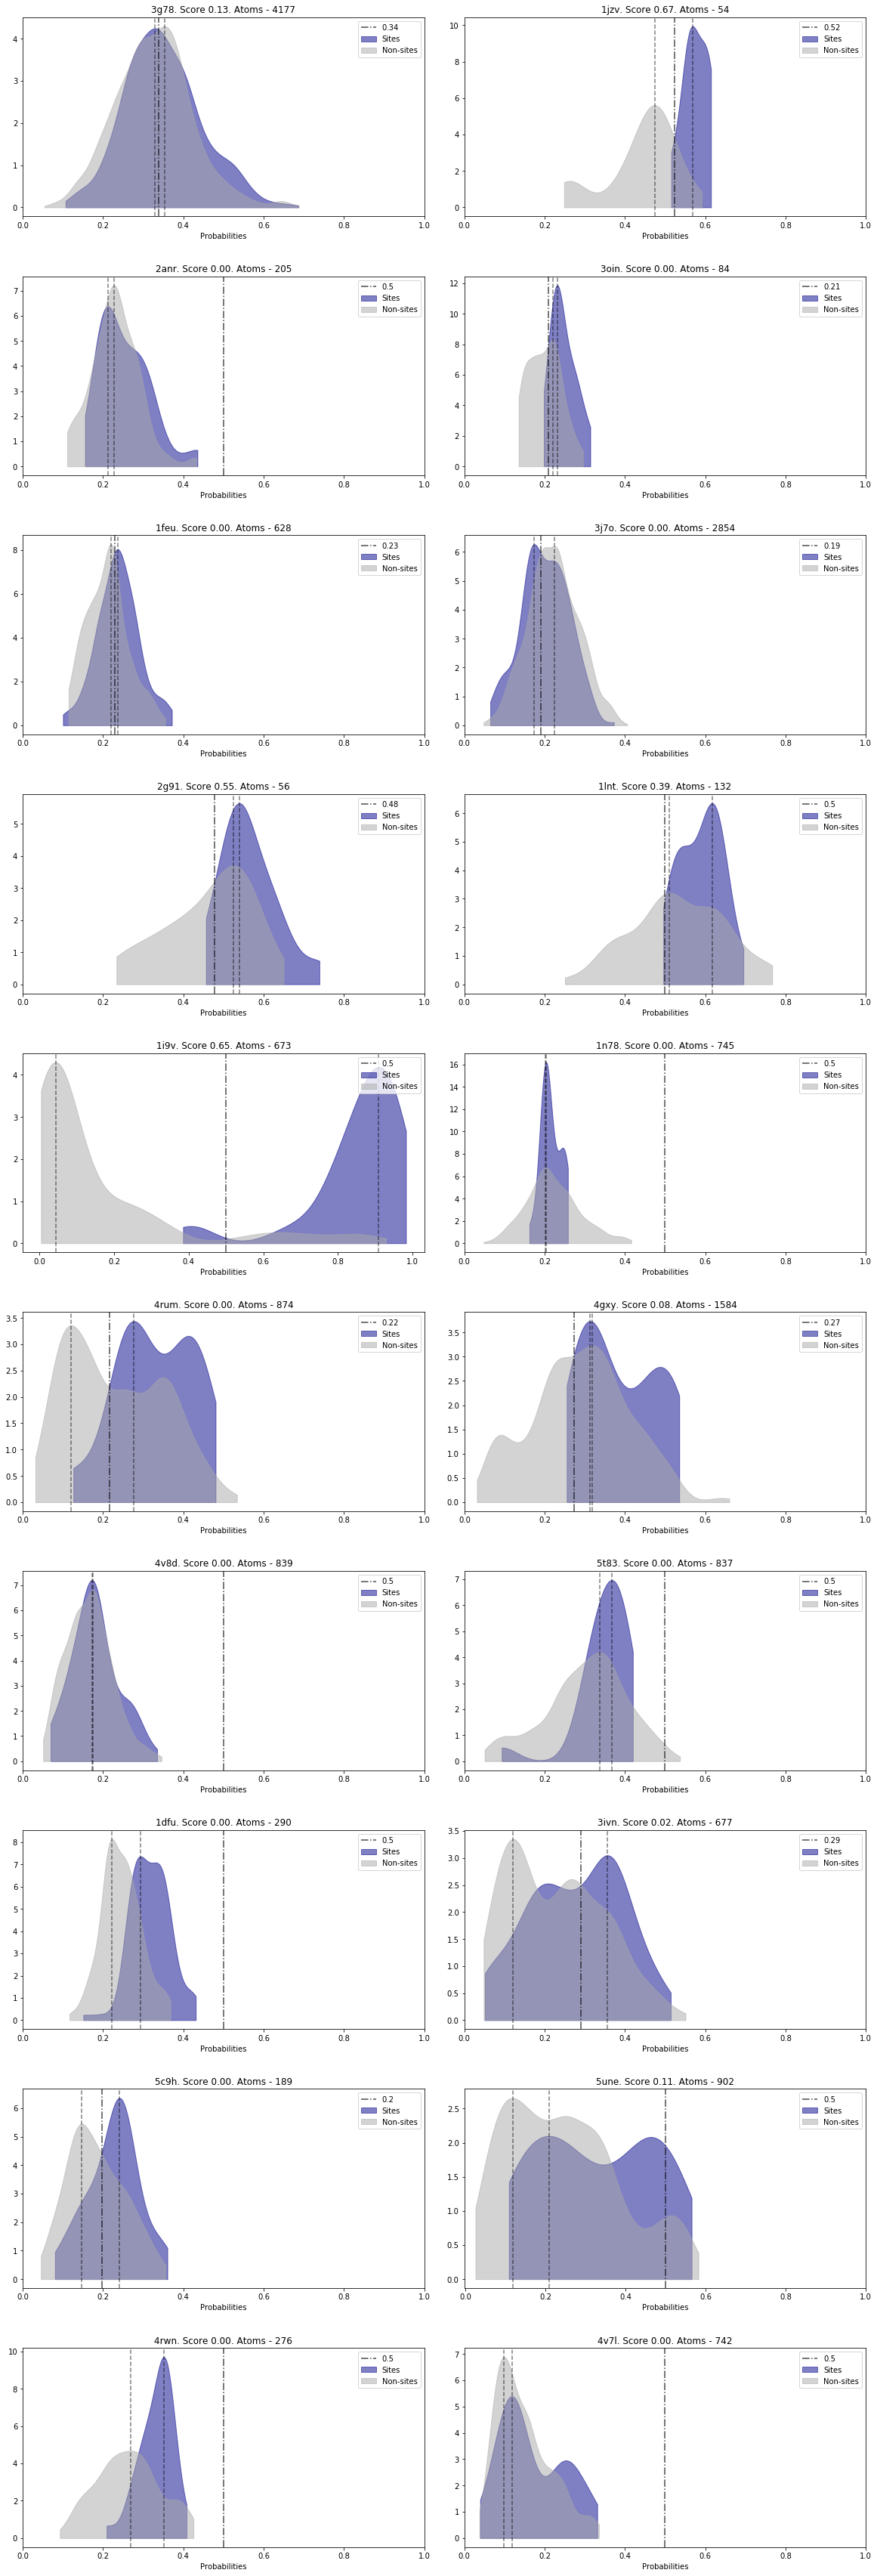

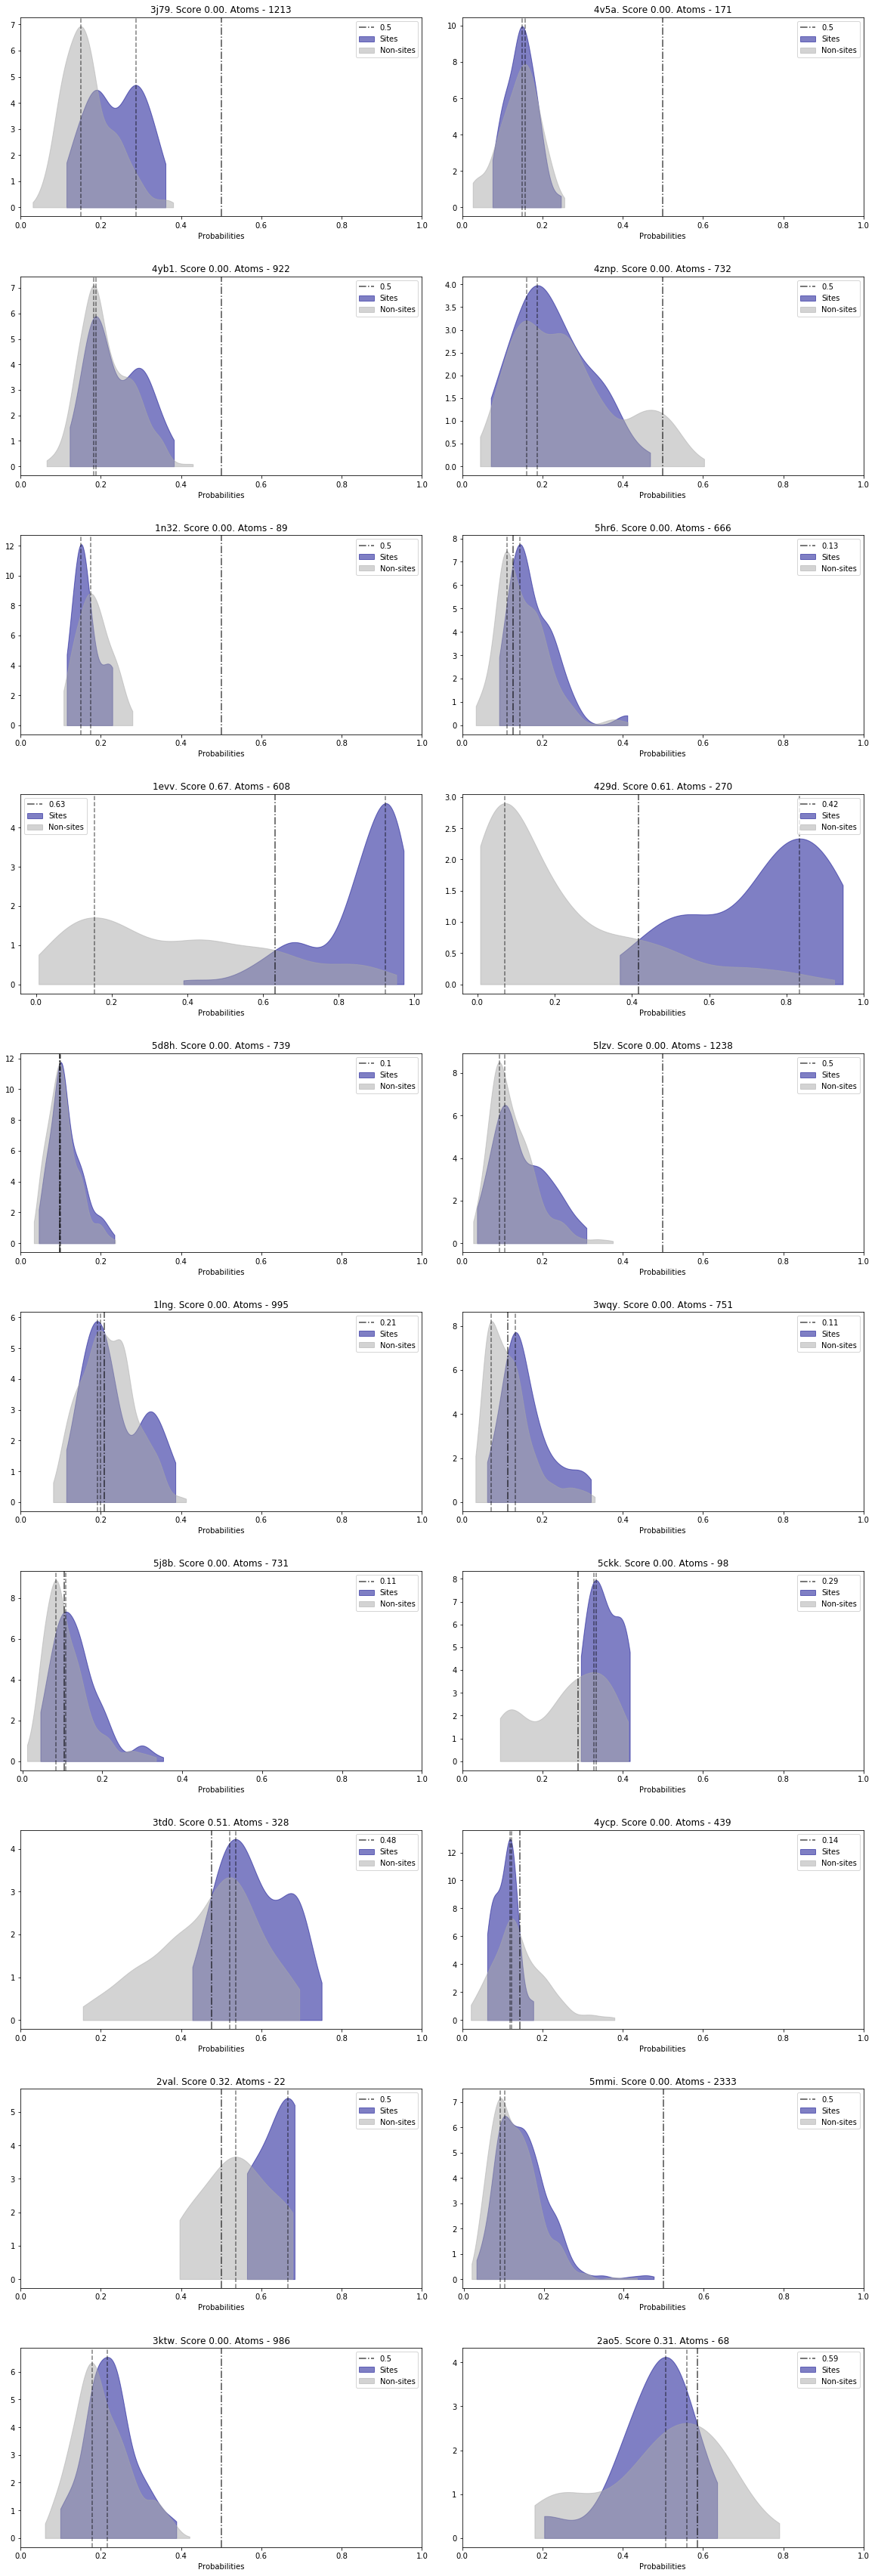

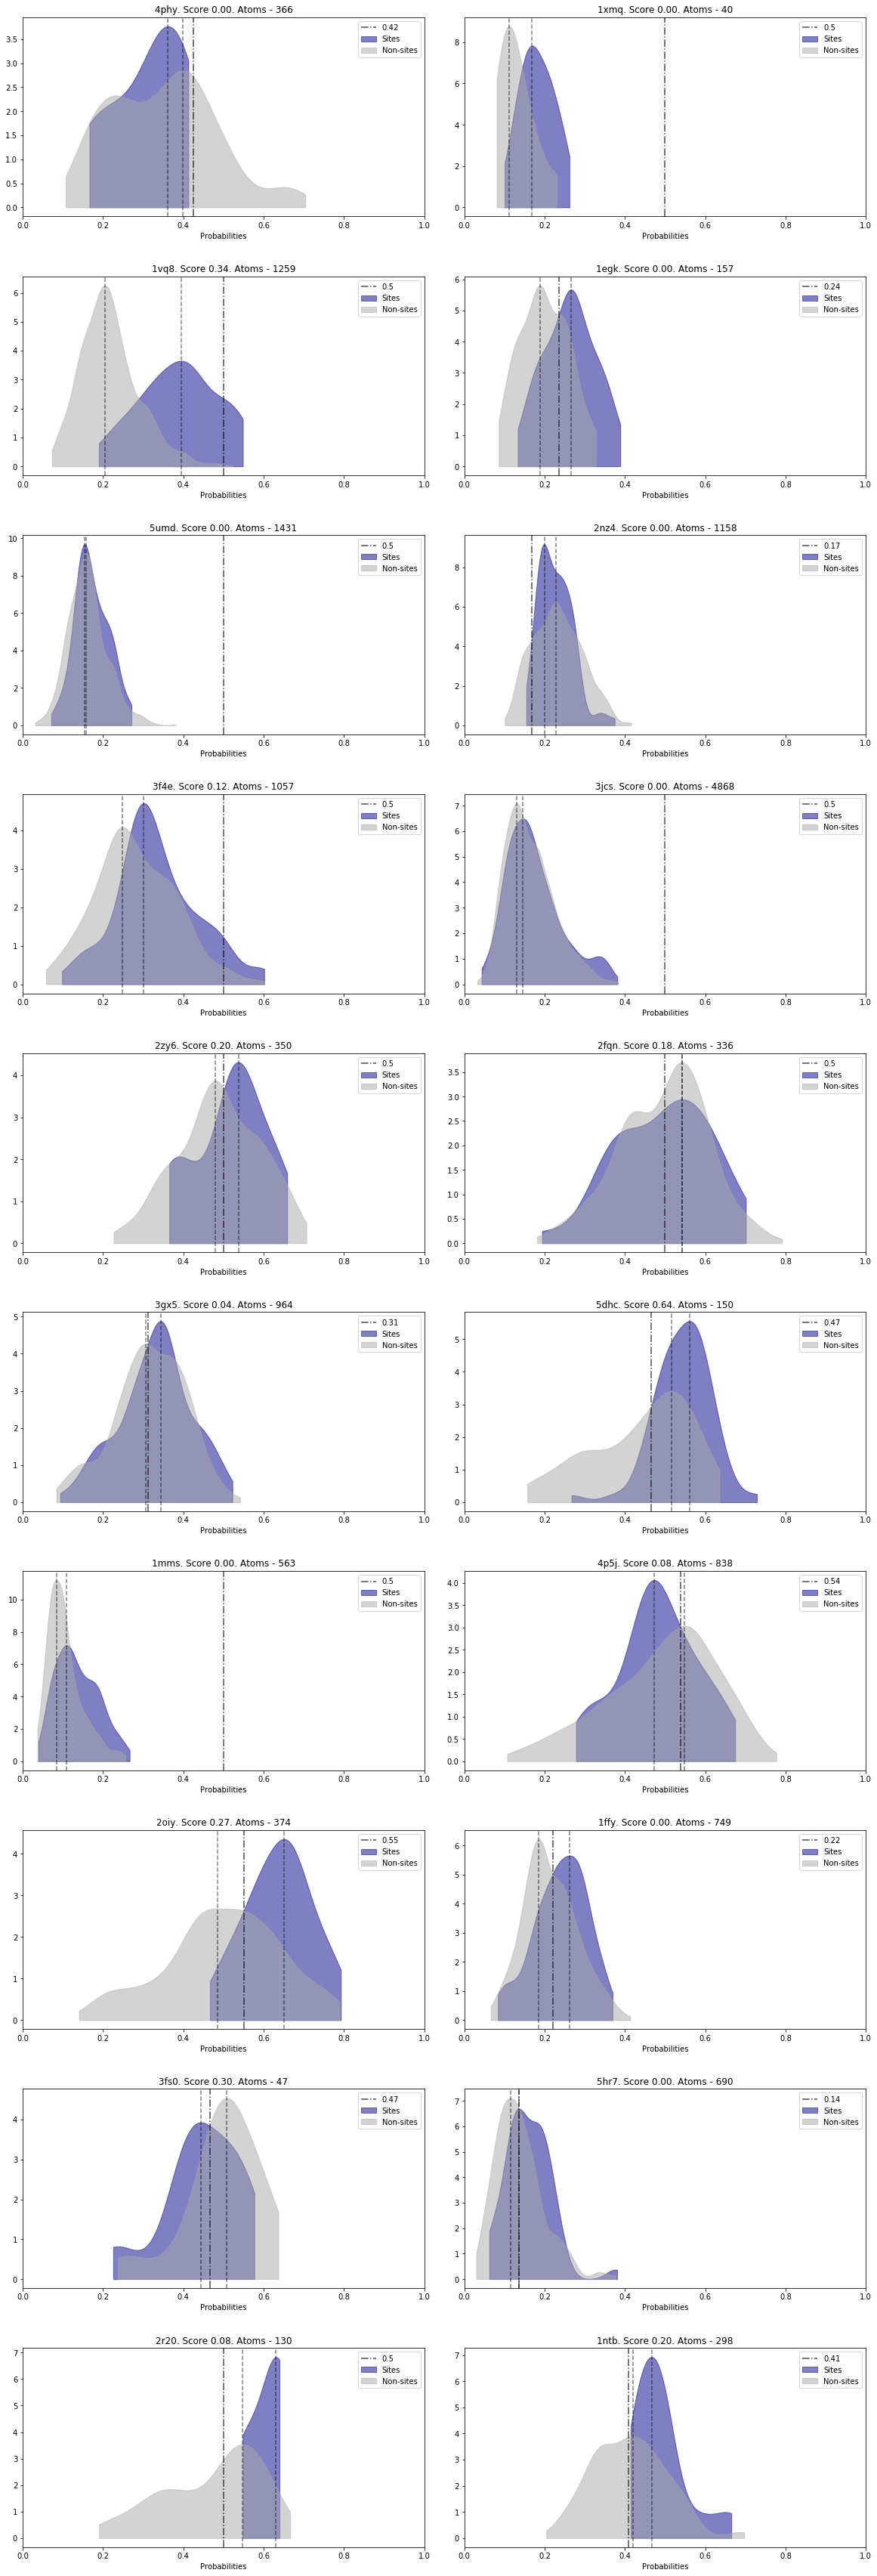

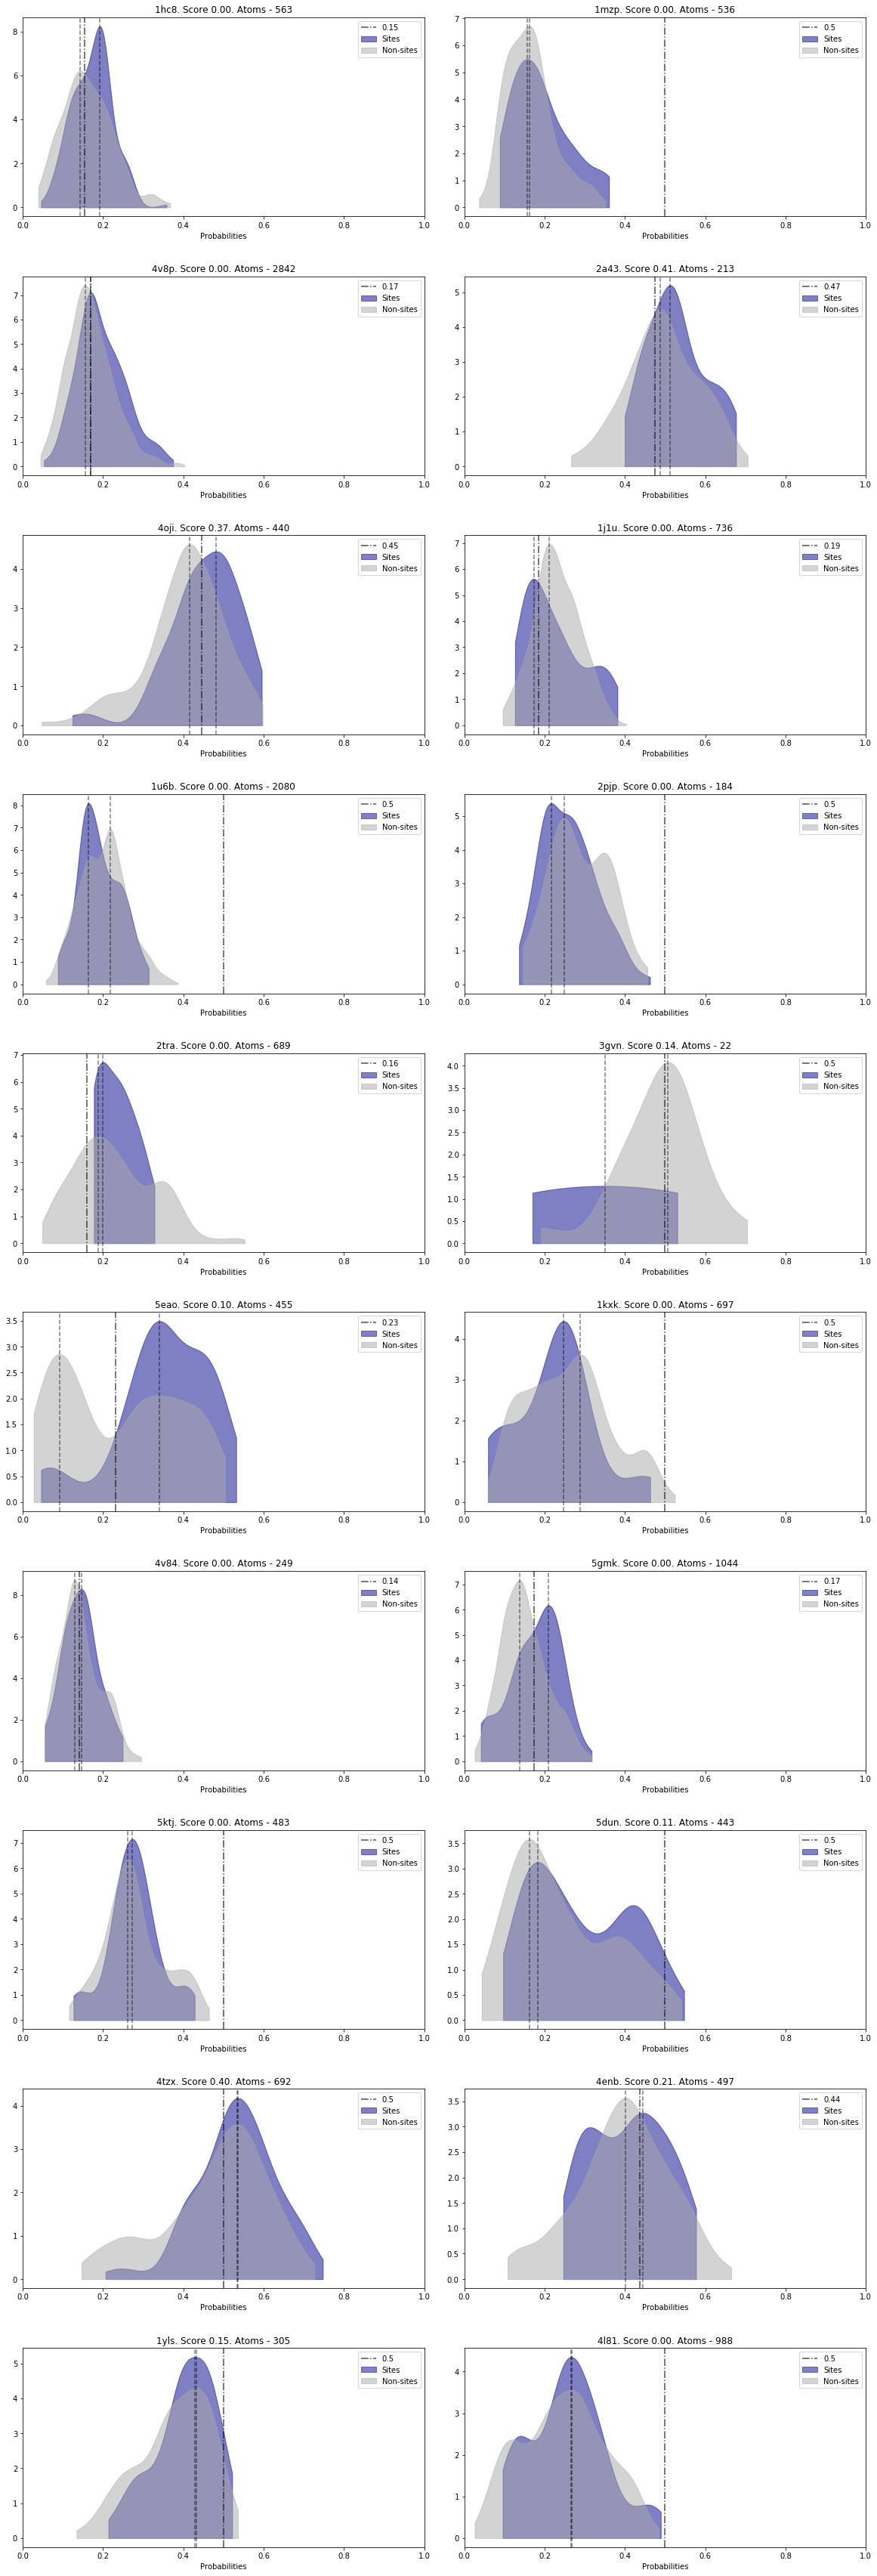

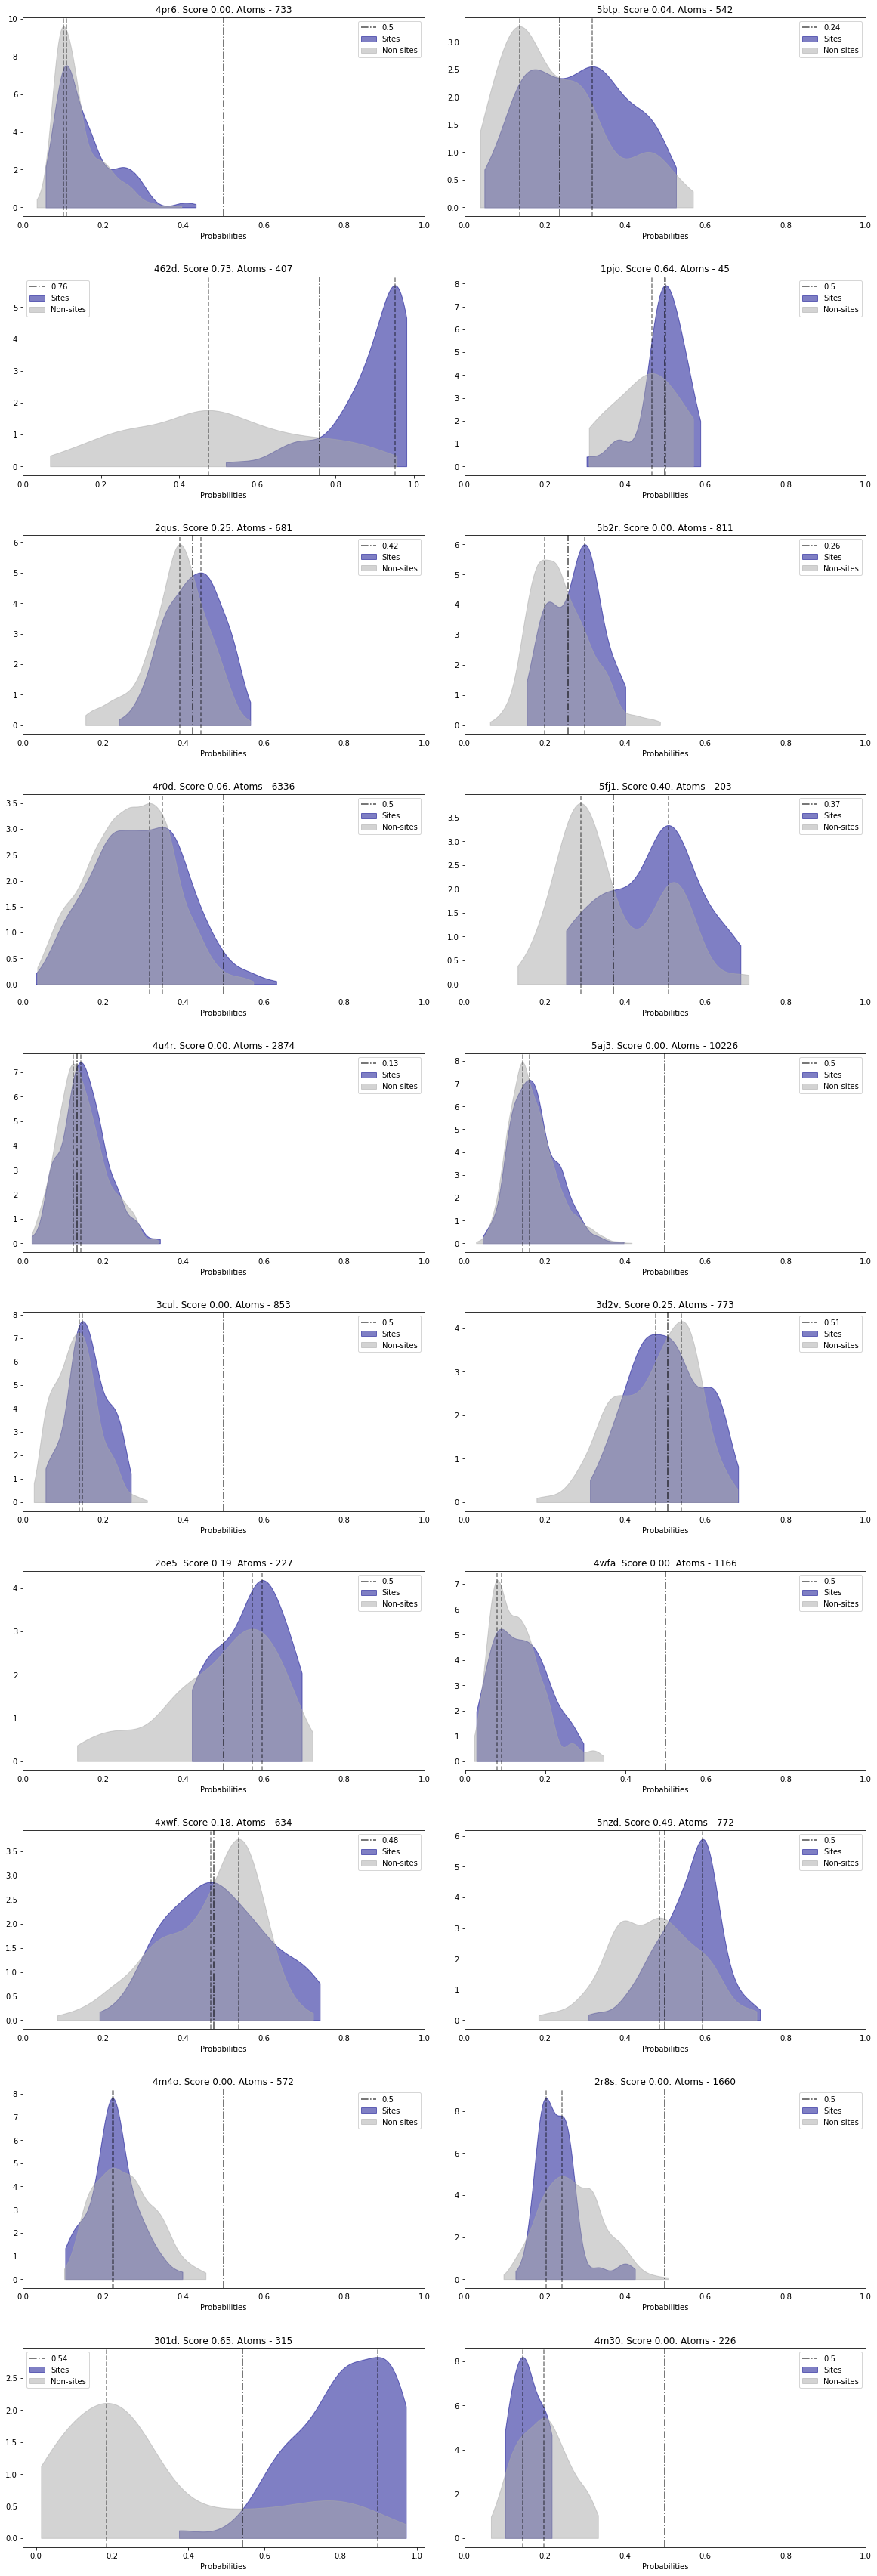

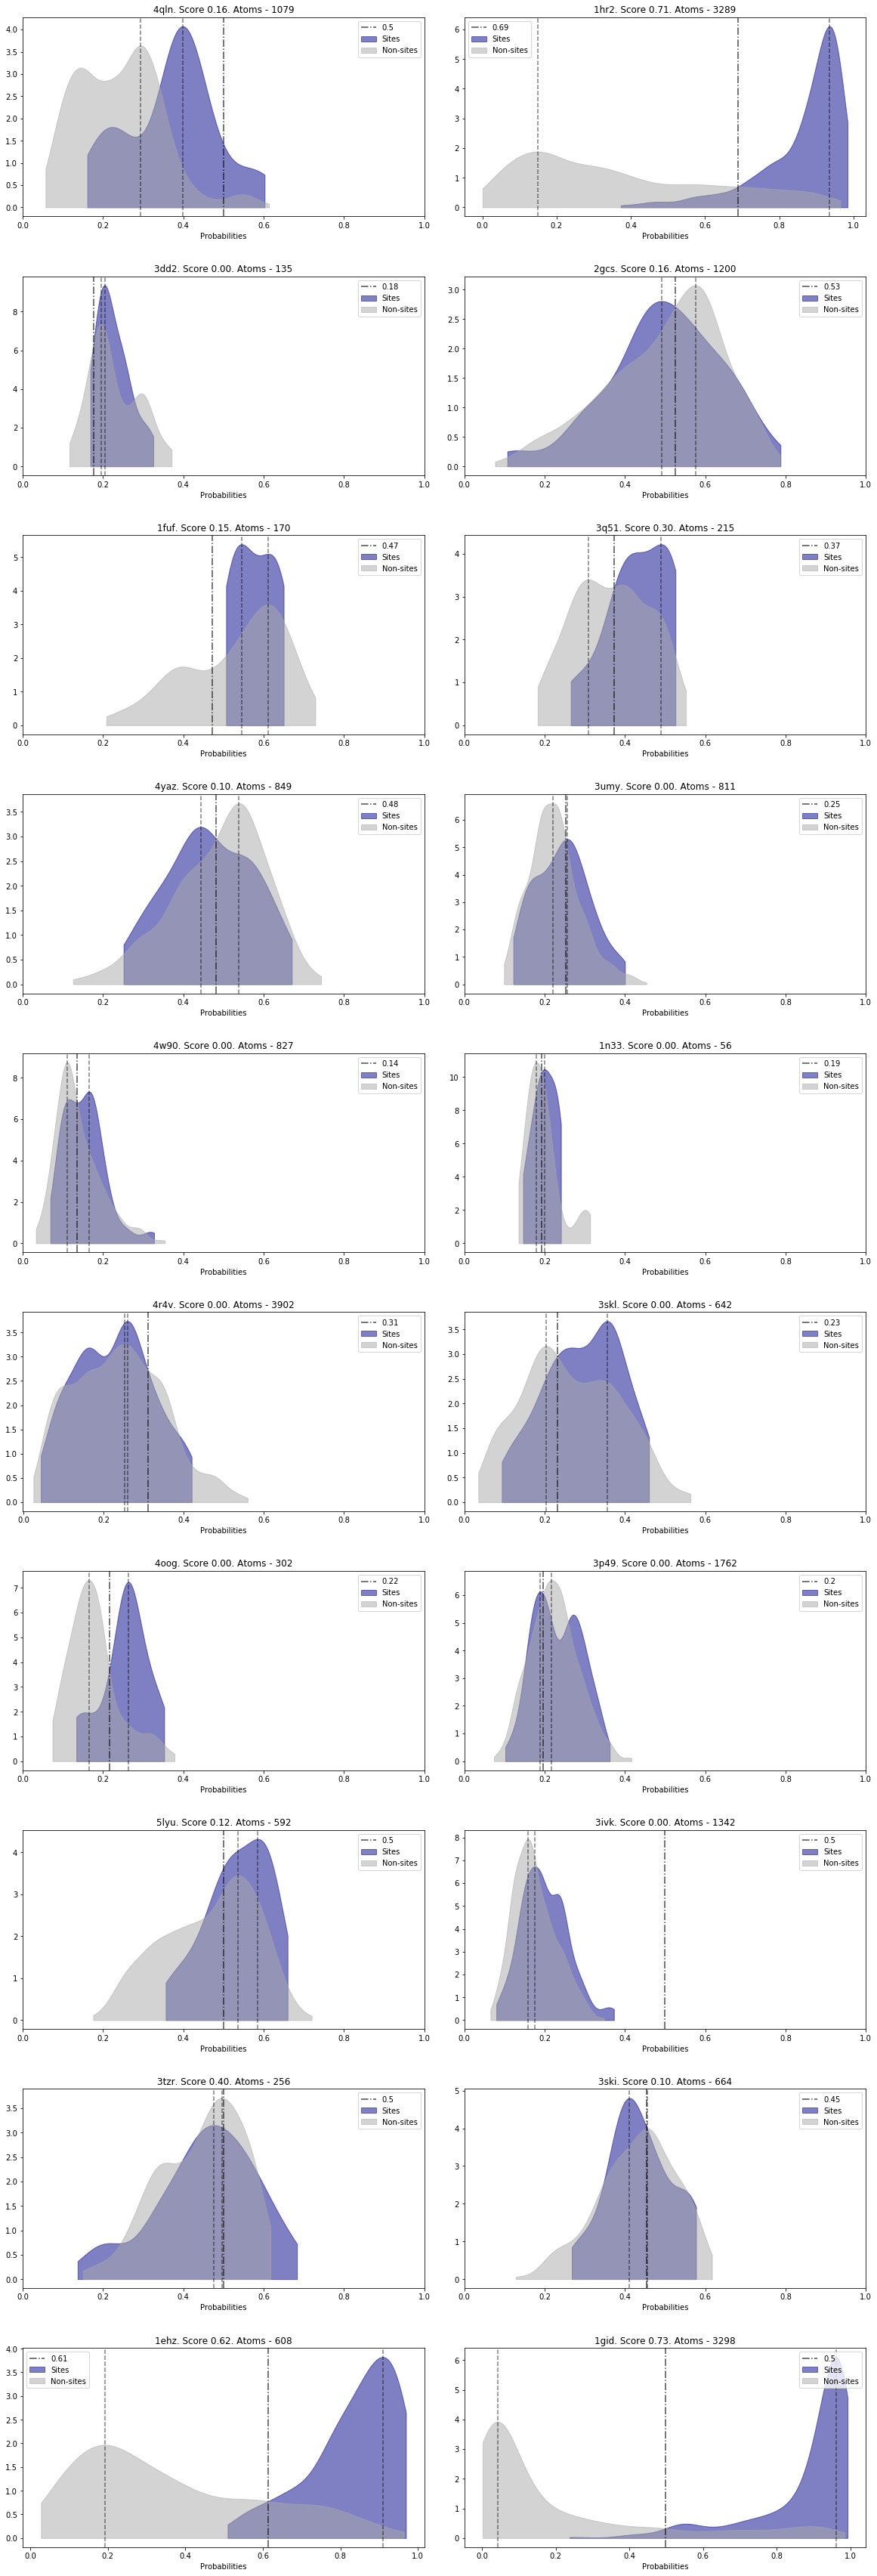

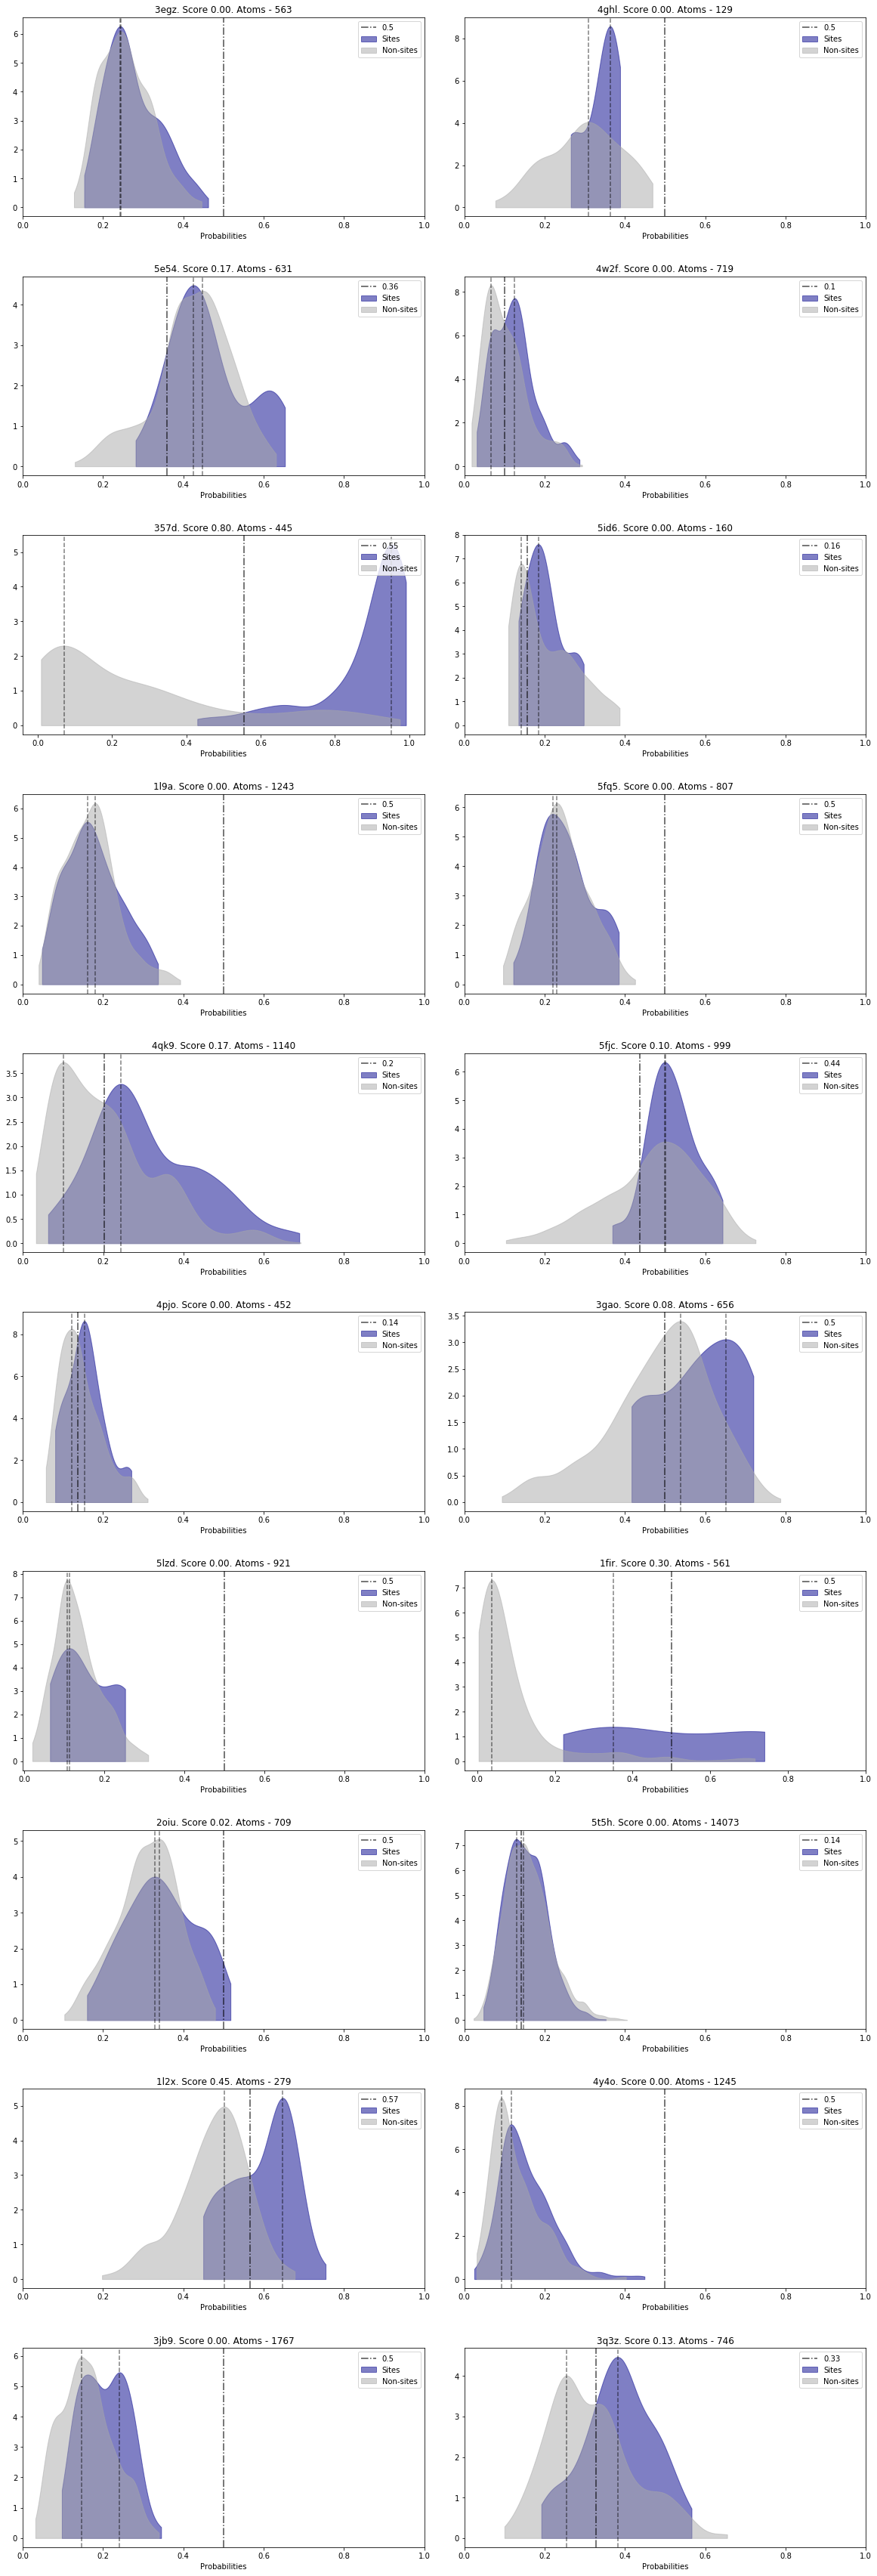

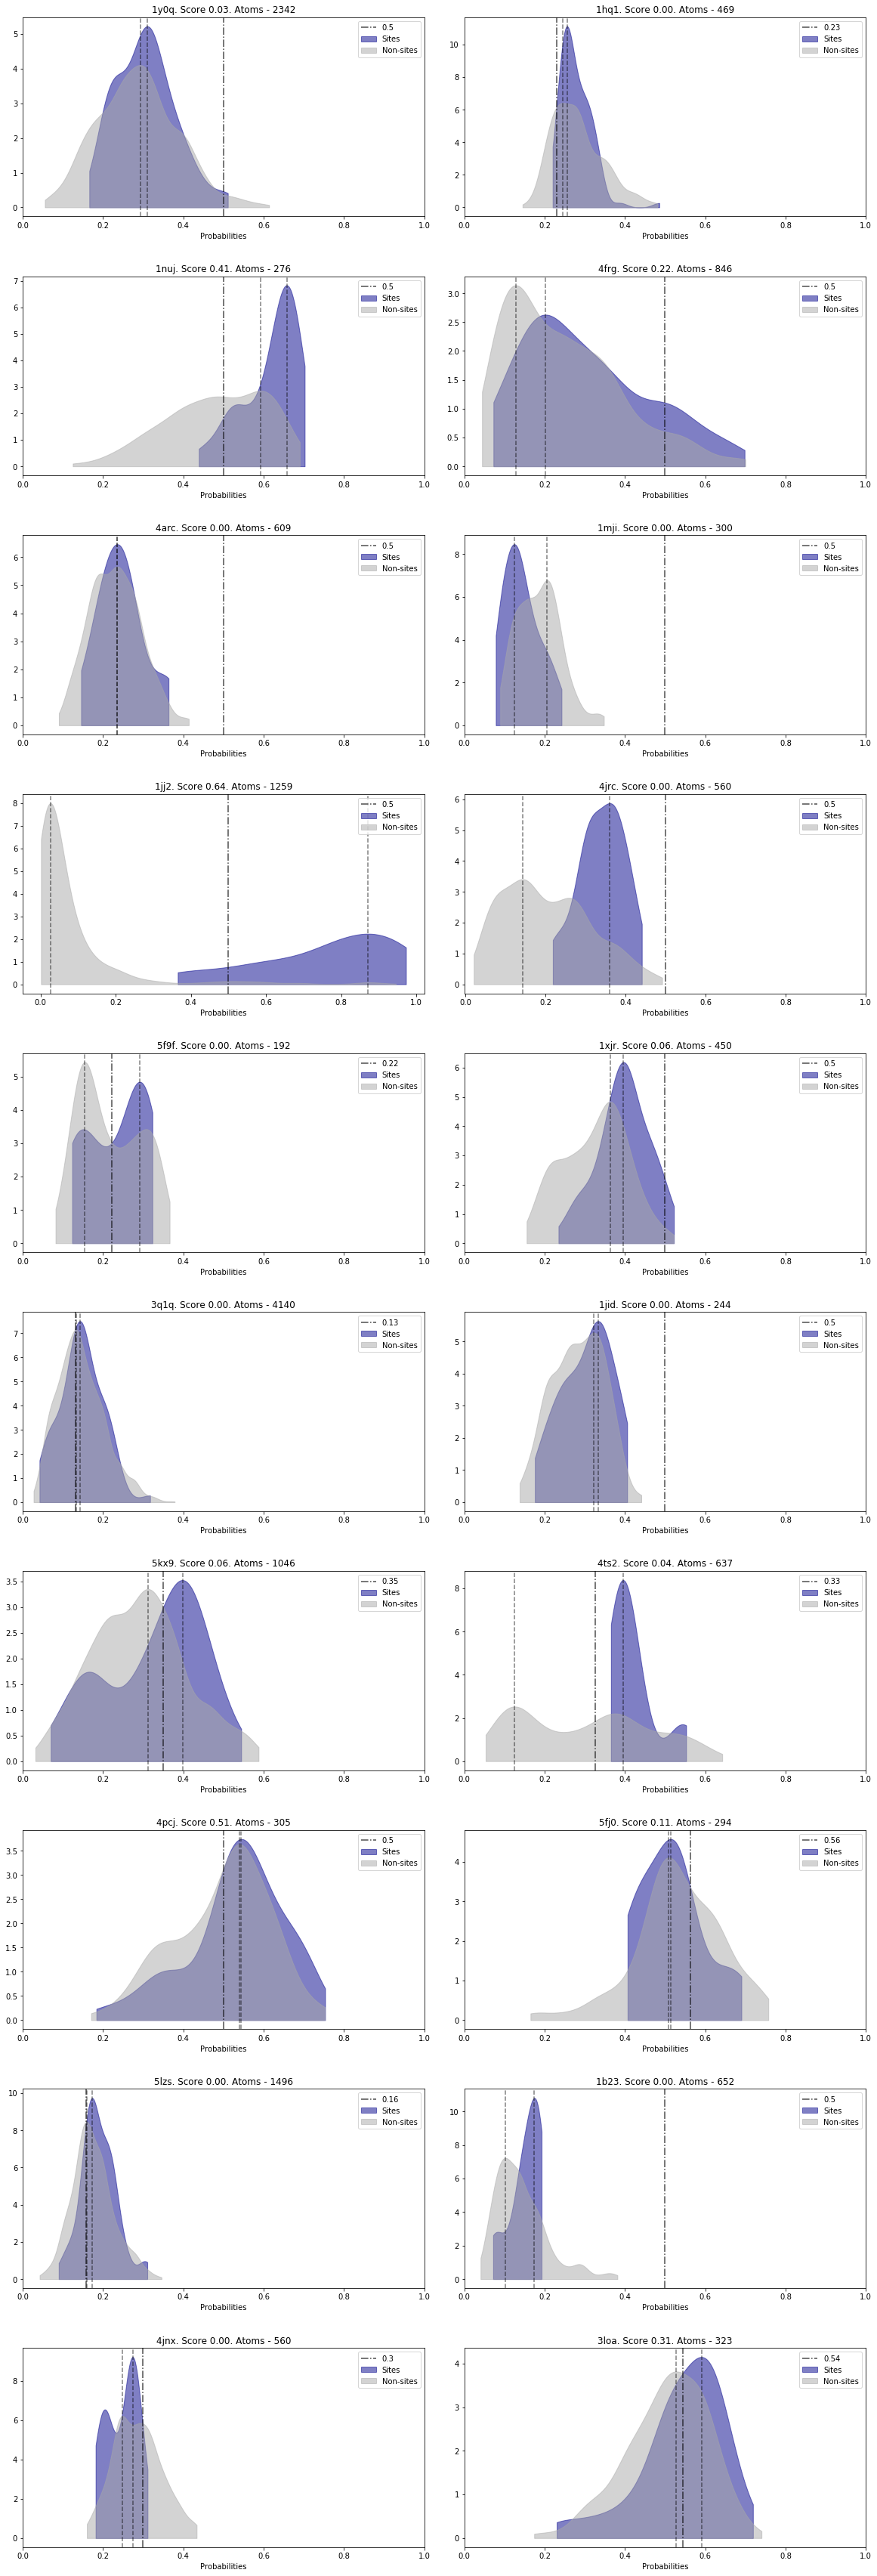

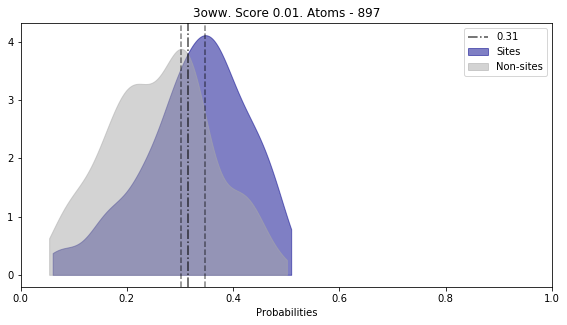

In [78]:
plt.rcParams['figure.facecolor'] = 'white'

#fig, big_axes = plt.subplots( figsize=(20, 40), nrows=ceil(len(plot_train.keys())/2), ncols=1, sharey=True) 
# fig = plt.figure(figsize=(20, 40))
# plt.subplots_adjust(hspace=0.3, wspace=0.1)

for i, program in tqdm_notebook(enumerate(plot_train.keys())):
    if os.path.isdir('outputs/good_structures') == False:
        os.mkdir('outputs/good_structures')
    if i % 20 == 0:
        if i != 0:
            fig.savefig('outputs/good_structures/%i.png'%(i//20))
        fig = plt.figure(figsize=(20, 50))
        plt.subplots_adjust(top = 0.98, bottom = 0.05,  hspace=0.3, wspace=0.1)
    fig.add_subplot(10, 2, i%20+1)
    [eval(plot_string) for plot_string in plot_train[program]]
fig.savefig('outputs/good_structures/%i.png'%(i//20))

In [84]:
df_1['data']

pdb_chain  xray  resol  chainlen  protein  alpham2  betam2  gammam2  \
30    5nwq.cif1_A     1  1.910        41        0    -71.6   177.0     57.1   
31    5nwq.cif1_A     1  1.910        41        0    -71.6   177.0     57.1   
32    5nwq.cif1_A     1  1.910        41        0    -71.6   177.0     57.1   
33    5nwq.cif1_A     1  1.910        41        0    -71.6   177.0     57.1   
34    5nwq.cif1_A     1  1.910        41        0    -71.6   177.0     57.1   
35    5nwq.cif1_A     1  1.910        41        0    -71.6   177.0     57.1   
36    5nwq.cif1_A     1  1.910        41        0    -71.6   177.0     57.1   
37    5nwq.cif1_A     1  1.910        41        0    -71.6   177.0     57.1   
38    5nwq.cif1_A     1  1.910        41        0    -71.6   177.0     57.1   
39    5nwq.cif1_A     1  1.910        41        0    -71.6   177.0     57.1   
40    5nwq.cif1_A     1  1.910        41        0    -71.6   177.0     57.1   
41    5nwq.cif1_A     1  1.910        41        0    -71.6   177.0     57.1   
42    5nwq.cif1_A     1  1.910        41        0    -62.1   178.8     46.9   
43    5nwq.cif1_A     1  1.910        41        0    -62.1   178.8     46.9   
44    5nwq.cif1_A     1  1.910        41        0    -62.1   178.8     46.9   
45    5nwq.cif1_A     1  1.910        41        0    -62.1   178.8     46.9   
46    5nwq.cif1_A     1  1.910        41        0    -62.1   178.8     46.9   
47    5nwq.cif1_A     1  1.910        41        0    -62.1   178.8     46.9   
48    5nwq.cif1_A     1  1.910        41        0    -62.1   178.8     46.9   
49    5nwq.cif1_A     1  1.910        41        0    -62.1   178.8     46.9   
50    5nwq.cif1_A     1  1.910        41        0    -62.1   178.8     46.9   
51    5nwq.cif1_A     1  1.910        41        0    -62.1   178.8     46.9   
52    5nwq.cif1_A     1  1.910        41        0    -62.1   178.8     46.9   
53    5nwq.cif1_A     1  1.910        41        0    -62.1   172.7     54.3   
54    5nwq.cif1_A     1  1.910        41        0    -62.1   172.7     54.3   
55    5nwq.cif1_A     1  1.910        41        0    -62.1   172.7     54.3   
56    5nwq.cif1_A     1  1.910        41        0    -62.1   172.7     54.3   
57    5nwq.cif1_A     1  1.910        41        0    -62.1   172.7     54.3   
58    5nwq.cif1_A     1  1.910        41        0    -62.1   172.7     54.3   
59    5nwq.cif1_A     1  1.910        41        0    -62.1   172.7     54.3   
...           ...   ...    ...       ...      ...      ...     ...      ...   
1242  5nzd.cif1_B     1  2.007        41        0    126.2  -154.5   -158.2   
1243  5nzd.cif1_B     1  2.007        41        0    126.2  -154.5   -158.2   
1244  5nzd.cif1_B     1  2.007        41        0    126.2  -154.5   -158.2   
1245  5nzd.cif1_B     1  2.007        41        0    126.2  -154.5   -158.2   
1246  5nzd.cif1_B     1  2.007        41        0    126.2  -154.5   -158.2   
1247  5nzd.cif1_B     1  2.007        41        0    126.2  -154.5   -158.2   
1248  5nzd.cif1_B     1  2.007        41        0    -59.3   129.2     64.4   
1249  5nzd.cif1_B     1  2.007        41        0    -59.3   129.2     64.4   
1250  5nzd.cif1_B     1  2.007        41        0    -59.3   129.2     64.4   
1251  5nzd.cif1_B     1  2.007        41        0    -59.3   129.2     64.4   
1252  5nzd.cif1_B     1  2.007        41        0    -59.3   129.2     64.4   
1253  5nzd.cif1_B     1  2.007        41        0    -59.3   129.2     64.4   
1254  5nzd.cif1_B     1  2.007        41        0    -59.3   129.2     64.4   
1255  5nzd.cif1_B     1  2.007        41        0    -59.3   129.2     64.4   
1256  5nzd.cif1_B     1  2.007        41        0    -59.3   129.2     64.4   
1257  5nzd.cif1_B     1  2.007        41        0    -59.3   129.2     64.4   
1258  5nzd.cif1_B     1  2.007        41        0    -59.3   129.2     64.4   
1259  5nzd.cif1_B     1  2.007        41        0    -59.3   129.2     64.4   
1260  5nzd.cif1_B     1  2.007        41        0   -135.2

In [68]:
from win10toast import ToastNotifier
toaster = ToastNotifier()
toaster.show_toast("Computations are done!",
             "Lets see them!")